In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("dark_background")

color_f = 'hotpink'
color_m = 'royalblue'

input for individual results

In [2]:
number = 1171
age    = 35

read data

In [3]:
df = pd.read_csv('output.csv', index_col=0)

df['time'] = pd.to_timedelta(df['time'])
df['time_min'] = df['time'].dt.total_seconds()/60

df

,number,age,sex,time,time_min
place,,,,,
1,11,NaN,M,0 days 01:00:50,60.833333
2,4,NaN,M,0 days 01:01:22,61.366667
3,2,23.0,M,0 days 01:01:24,61.400000
4,9,NaN,M,0 days 01:02:15,62.250000
5,5,30.0,M,0 days 01:02:19,62.316667
...,...,...,...,...,...
7322,8579,NaN,W,0 days 03:13:59,193.983333
7323,4191,NaN,M,0 days 03:16:56,196.933333
7324,2492,60.0,M,0 days 03:18:03,198.050000


overall stats

In [4]:
N_total = len(df['number'].unique())
print(f'{N_total} finishers')

N_male = df[df['sex'] == 'M'].shape[0]
print(f'{round(N_male/N_total*100)} % male')

hours,   remainder = divmod(df['time_min'].median(), 60)
minutes, remainder = divmod(remainder, 1)
seconds = remainder * 60
print(f"median time: {int(hours)} hour, {int(minutes)} minutes, {int(seconds)} seconds")

7319 finishers
60 % male
median time: 1 hour, 57 minutes, 57 seconds


finish time distribution

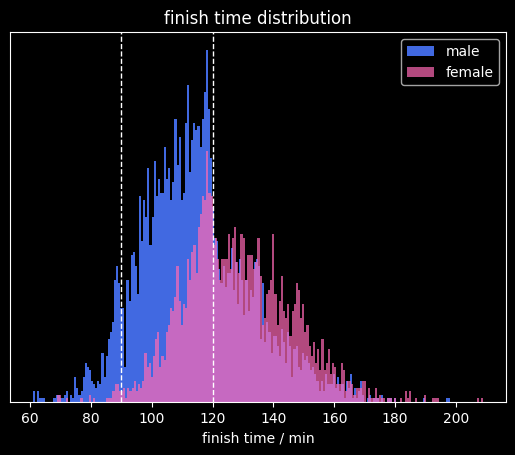

In [ ]:
plt.hist(df.loc[df['sex'] == 'M' , 'time_min'], bins=200, color=color_m, label='male')
plt.hist(df.loc[df['sex'] == 'W' , 'time_min'], bins=200, color=color_f, label='female', alpha=0.7)

# plt.axvline(df.loc[df['number'] == number, 'time_min'].iloc[0], color='r', linestyle='dashed', linewidth=1, label=number)
plt.axvline(60 + 30,   color='w', linestyle='dashed', linewidth=1)
plt.axvline(2*60,      color='w', linestyle='dashed', linewidth=1)
# plt.axvline(df['time_min'].median(), color='w', linestyle='dashed', linewidth=1, label='median')

plt.title('finish time distribution')
plt.xlabel('finish time / min')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()

# plt.savefig('finish_time_distribution.png', dpi=300, transparent=True)

age distribution

In [6]:
df_age_male   = df[df['sex'] == 'M'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})
df_age_female = df[df['sex'] == 'W'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})

df_age = pd.merge(df_age_male, df_age_female, on='age', suffixes=['_m','_f'], how='outer').reset_index()

df_age['female_percentage'] = round(df_age['number_f'] / (df_age['number_m'] + df_age['number_f']) * 100 , 1)

N_age = df_age['number_m'].sum() + df_age['number_f'].sum()
print(f'{round(N_age/N_total*100)} % finishers with age group')

df_age

72 % finishers with age group


,age,time_min_m,number_m,time_min_f,number_f,female_percentage
0,18.0,115.516667,33,124.608333,12.0,26.7
1,20.0,106.033333,49,122.691667,30.0,38.0
2,23.0,108.316667,175,127.350000,197.0,53.0
3,30.0,112.308333,874,123.700000,553.0,38.8
4,35.0,111.458333,612,125.766667,309.0,33.6
5,40.0,110.433333,431,126.633333,247.0,36.4
6,45.0,113.500000,327,129.050000,208.0,38.9
7,50.0,114.933333,311,129.533333,139.0,30.9
8,55.0,118.600000,281,136.833333,125.0,30.8
9,60.0,121.633333,169,132.983333,61.0,26.5


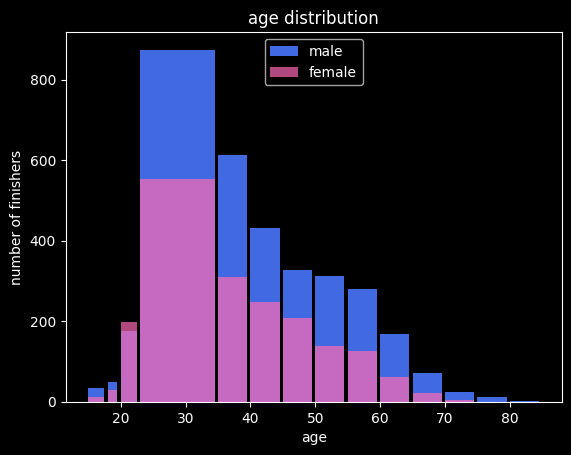

In [ ]:
plt.bar(15, df_age['number_m'].iloc[0], color=color_m, align='edge', width=2.5, label='male')
plt.bar(15, df_age['number_f'].iloc[0], color=color_f, align='edge', width=2.5, label='female', alpha=0.7)

plt.bar(df_age['age'].iloc[0], df_age['number_m'].iloc[1], color=color_m, align='edge', width=1.5)
plt.bar(df_age['age'].iloc[0], df_age['number_f'].iloc[1], color=color_f, align='edge', width=1.5, alpha=0.7)

plt.bar(df_age['age'].iloc[1], df_age['number_m'].iloc[2], color=color_m, align='edge', width=2.5)
plt.bar(df_age['age'].iloc[1], df_age['number_f'].iloc[2], color=color_f, align='edge', width=2.5, alpha=0.7)

plt.bar(df_age['age'].iloc[2],  df_age['number_m'].iloc[3],  color=color_m, align='edge', width=11.5)
plt.bar(df_age['age'].iloc[2],  df_age['number_f'].iloc[3],  color=color_f, align='edge', width=11.5, alpha=0.7)

plt.bar(df_age['age'].iloc[4:], df_age['number_m'].iloc[4:], color=color_m, align='edge', width=4.5)
plt.bar(df_age['age'].iloc[4:], df_age['number_f'].iloc[4:], color=color_f, align='edge', width=4.5, alpha=0.7)

plt.xlabel('age')
plt.ylabel('number of finishers')
plt.title('age distribution')
plt.legend()

# plt.savefig('age_distribution.png', dpi=300, transparent=True)

median finish time by age

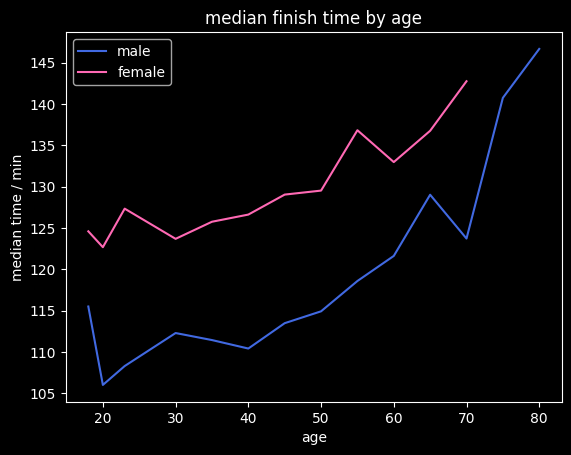

In [9]:
df_age.plot(x='age', y=['time_min_m','time_min_f'], color=[color_m, color_f], label=['male','female'])
plt.ylabel('median time / min')
plt.title('median finish time by age')
plt.legend()

# plt.savefig('finish_time_age.png', dpi=300, transparent=True)

individual results

In [10]:
df_male = df[df['sex'] == 'M']
df_male.reset_index(drop=True, inplace=True)

position_male = df_male[df_male['number'] == number].index[0] + 1

print(f'{position_male}. of {N_male} males ({position_male/N_male*100:.2f} %)')

2254. of 4382 males (51.44 %)


In [11]:
df_male_age = df_male[df_male['age'] == age]
df_male_age.reset_index(drop=True, inplace=True)

N_male_age = df_male_age.shape[0]

position_male_age = df_male_age[df_male_age['number'] == number].index[0] + 1

print(f'{position_male_age}. of {N_male_age} males ({position_male_age/N_male_age*100:.2f} %)')

342. of 612 males (55.88 %)
